<a href="https://colab.research.google.com/github/LinaTobon/Intro_Estadistica/blob/main/Fundamentos_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos de estadística**
En este taller vamos a explicar los siguientes conceptos básicos de estadística, para que puedas interpretar mejor tus datos.

*   Tipos de datos
*   Medidas de tendencia central
*   Medidas de variabilidad

Vamos a usar el famoso dataset del [titanic](https://www.kaggle.com/c/titanic/data) para poner en práctica nuestros conocimientos


Los campos o columnas que contiene el dataset son las siguientes:
- PassengerId -- un id numérico asignado a cada pasajero.
- Survived -- si el pasajero sobrevivió (1), si no sobrevivió (0).
- Pclass -- La clase en la que estaba el pasajero.
- Name -- el nombre del pasajero.
- Sex -- género del pasajero.
- Age -- edad del pasajero.
- SibSp -- número de hermanos y conyugues que el pasajero tenía a bordo.
- Parch -- número de padres e hijos que el pasajero tenía a bordo.
- Ticket -- número del tiquete del pasajero.
- Fare -- precio del tiquete.
- Cabin -- en qué cabina estaba ubicado el pasajero.
- Embarked -- lugar de embarque del pasajero.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Importando librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
# Cargamos el archivo
titanic = pd.read_csv("train.csv")

# Exploremos nuestro dataset

In [ ]:
# Visualizamos 5 filas del titanic
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


Conclusiones
* Tiquete tiene una mezcla de datos numéricos y  alfanumericos.
* Cabina es alfanumerico

In [ ]:
# Vamos a renombrar las columnas, para traducirlas a español
esp_colum ={'PassengerId':'IdPasajero','Survived':'Sobrevivio','Pclass':'Clase',\
           'Name':'Nombre','Sex':'Genero','Age':'Edad','SibSp':'HermEsp','Parch':'PadresHijos',\
           'Ticket':'Tiquete','Fare':'Precio','Cabin':'Cabina','Embarked':'Embarque'}
titanic.rename(columns=esp_colum,inplace=True)

### Conozcamos los campos del dataset

*   ¿Cuántos registros tiene el dataset?
    *El dataset tiene 890 entradas o registros*
*   ¿Qué columnas tienen registros vacíos?
    *Edad,Cabina y Embarque tienen registros vacíos*
*   ¿Qué tipos de datos que tiene nuestro dataset?
    *Cinco campos son enteros, 2 tienen decimales (float). Cinco campos son strings (object)*



In [ ]:
# Tipos de datos que tiene nuestro dataset y que cantidad de nulos tiene (non-null -->no nulo)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdPasajero   891 non-null    int64  
 1   Sobrevivio   891 non-null    int64  
 2   Clase        891 non-null    int64  
 3   Nombre       891 non-null    object 
 4   Genero       891 non-null    object 
 5   Edad         714 non-null    float64
 6   HermEsp      891 non-null    int64  
 7   PadresHijos  891 non-null    int64  
 8   Tiquete      891 non-null    object 
 9   Precio       891 non-null    float64
 10  Cabina       204 non-null    object 
 11  Embarque     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **¿Qué tipos de datos son nuestras columnas?**

### **Categóricos**

**Nominales:**
* IdPasajero
* Sobrevivio
* Nombre
* Genero
* Tiquete
* Cabina
* Embarque

**Ordinales**
* Clase

### **Numéricos**

**Continuos:**
  * Edad**
  * Precio
**Discretos:**
  * HermEsp
  * PadresHijos



### Conozcamos los niveles de las variables categóricas

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Sobrevivio' sin nulos
titanic['Sobrevivio'].value_counts()

0    549
1    342
Name: Sobrevivio, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Clase' sin nulos
titanic['Clase'].value_counts()

3    491
1    216
2    184
Name: Clase, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Genero' sin nulos
titanic['Genero'].value_counts()

male      577
female    314
Name: Genero, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Cabina' sin nulos
titanic['Cabina'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Embarque' sin nulos
titanic['Embarque'].value_counts()

S    644
C    168
Q     77
Name: Embarque, dtype: int64

In [ ]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dowdell, Miss. Elizabeth",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Conozcamos los posibles valores de las variables numéricos, para identificar si hay valores extraños

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Edad' sin nulos
titanic['Edad'].value_counts().sort_values().to_dict()

{0.42: 1,
 0.67: 1,
 0.75: 2,
 0.83: 2,
 0.92: 1,
 1.0: 7,
 2.0: 10,
 3.0: 6,
 4.0: 10,
 5.0: 4,
 6.0: 3,
 7.0: 3,
 8.0: 4,
 9.0: 8,
 10.0: 2,
 11.0: 4,
 12.0: 1,
 13.0: 2,
 14.0: 6,
 14.5: 1,
 15.0: 5,
 16.0: 17,
 17.0: 13,
 18.0: 26,
 19.0: 25,
 20.0: 15,
 20.5: 1,
 21.0: 24,
 22.0: 27,
 23.0: 15,
 23.5: 1,
 24.0: 30,
 24.5: 1,
 25.0: 23,
 26.0: 18,
 27.0: 18,
 28.0: 25,
 28.5: 2,
 29.0: 20,
 30.0: 25,
 30.5: 2,
 31.0: 17,
 32.0: 18,
 32.5: 2,
 33.0: 15,
 34.0: 15,
 34.5: 1,
 35.0: 18,
 36.0: 22,
 36.5: 1,
 37.0: 6,
 38.0: 11,
 39.0: 14,
 40.0: 13,
 40.5: 2,
 41.0: 6,
 42.0: 13,
 43.0: 5,
 44.0: 9,
 45.0: 12,
 45.5: 2,
 46.0: 3,
 47.0: 9,
 48.0: 9,
 49.0: 6,
 50.0: 10,
 51.0: 7,
 52.0: 6,
 53.0: 1,
 54.0: 8,
 55.0: 2,
 55.5: 1,
 56.0: 4,
 57.0: 2,
 58.0: 5,
 59.0: 2,
 60.0: 4,
 61.0: 3,
 62.0: 4,
 63.0: 2,
 64.0: 2,
 65.0: 3,
 66.0: 1,
 70.0: 2,
 70.5: 1,
 71.0: 2,
 74.0: 1,
 80.0: 1}

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'HermEsp' sin nulos
titanic['HermEsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: HermEsp, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'PadresHijos' sin nulos
titanic['PadresHijos'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: PadresHijos, dtype: int64

In [ ]:
# Cuantos registros tenemos por categoria de la columna 'Precio' sin nulos
titanic['Precio'].value_counts().sort_values().to_dict()

{0.0: 15,
 4.0125: 1,
 5.0: 1,
 6.2375: 1,
 6.4375: 1,
 6.45: 1,
 6.4958: 2,
 6.75: 2,
 6.8583: 1,
 6.95: 1,
 6.975: 2,
 7.0458: 1,
 7.05: 7,
 7.0542: 2,
 7.125: 4,
 7.1417: 1,
 7.225: 12,
 7.2292: 15,
 7.25: 13,
 7.3125: 1,
 7.4958: 3,
 7.5208: 1,
 7.55: 4,
 7.6292: 1,
 7.65: 4,
 7.725: 1,
 7.7292: 1,
 7.7333: 4,
 7.7375: 2,
 7.7417: 1,
 7.75: 34,
 7.775: 16,
 7.7875: 1,
 7.7958: 6,
 7.8: 1,
 7.8292: 2,
 7.8542: 13,
 7.875: 1,
 7.8792: 4,
 7.8875: 1,
 7.8958: 38,
 7.925: 18,
 8.0292: 1,
 8.05: 43,
 8.1125: 1,
 8.1375: 1,
 8.1583: 1,
 8.3: 1,
 8.3625: 1,
 8.4042: 1,
 8.4333: 1,
 8.4583: 1,
 8.5167: 1,
 8.6542: 1,
 8.6625: 13,
 8.6833: 1,
 8.7125: 1,
 8.85: 1,
 9.0: 2,
 9.2167: 1,
 9.225: 2,
 9.35: 2,
 9.475: 1,
 9.4833: 1,
 9.5: 9,
 9.5875: 2,
 9.825: 2,
 9.8375: 1,
 9.8417: 1,
 9.8458: 1,
 10.1708: 1,
 10.4625: 2,
 10.5: 24,
 10.5167: 1,
 11.1333: 3,
 11.2417: 2,
 11.5: 4,
 12.0: 1,
 12.275: 1,
 12.2875: 1,
 12.35: 3,
 12.475: 4,
 12.525: 1,
 12.65: 1,
 12.875: 1,
 13.0: 42,
 13.4167:

# Medidas de tendencia central


*   Moda
*   Media
*   Mediana



# Medidas de dispercion


*   Desviación estándar
*   Varianza
*   Rango intercuantil



In [ ]:
# Resumen de las columnas numericas
titanic.describe()

,IdPasajero,Sobrevivio,Clase,Edad,HermEsp,PadresHijos,Precio
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print('media de edad'+' ' +str(np.mean(titanic['Edad'])))
print('mediana de edad'+' ' +str(np.median(titanic['Edad'].dropna().tolist())))
print('moda de edad'+' ' +str(stats.mode(titanic['Edad'])[0]))

print('media de precio'+' ' +str(np.mean(titanic['Precio'])))
print('mediana de precio'+' ' +str(np.median(titanic['Precio'].dropna().tolist())))
print('moda de precio'+' ' +str(stats.mode(titanic['Precio'])[0]))



media de edad 29.69911764705882
mediana de edad 28.0
moda de edad [24.]
media de precio 32.2042079685746
mediana de precio 14.4542
moda de precio [8.05]


In [ ]:
# Rango Intercuartil con stats
IQR_stats = stats.iqr(titanic['Edad'].value_counts().index.to_list(), interpolation = 'midpoint')


# First quartile (Q1)
Q1 = np.percentile(titanic['Edad'].value_counts().index.to_list(), 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(titanic['Edad'].value_counts().index.to_list(), 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR_np = Q3 - Q1
print("IQR Edad con stats"+" "+ str(IQR_stats))
print("IQR Edad con numpy"+" "+ str(IQR_np))

IQR Edad con stats 34.0
IQR Edad con numpy 34.0


In [ ]:
# ¿Qué pasa si agregamos otro registro?


nueva_fila ={'IdPasajero':[892],'Sobrevivio':[1],'Clase':[1],'Nombre':['Wadr.MissAnne'],\
             'Genero':['female'],'Edad':[35],'HermEsp':[0],'PadresHijos':[0],'Tiquete':['PC17755'],\
             'Precio':[5123292000],'Cabina':['A20'],'Embarque':['C']}
df2 = pd.DataFrame.from_dict(nueva_fila)
new_df = titanic.append(df2,ignore_index=True)



In [ ]:

print('nueva media de Precio'+' ' +str(round(np.mean(new_df['Precio']),4)))
print('nueva mediana de Precio'+' ' +str(round(np.median(new_df['Precio']),4)))


nueva media de Precio 5743633.065
nueva mediana de Precio 14.4542


# Gráficos

 **Variables Categóricas** 

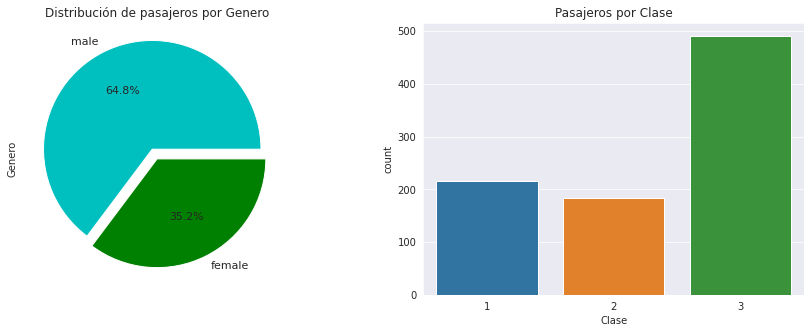

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,5))
titanic.Genero.value_counts().plot(kind = 'pie', autopct='%1.1f%%',shadow=False, \
                                ax=axis[0], legend = False, fontsize=11, \
                                colors = ['c', 'g'],explode=[0.1,0])
axis[0].set_title('Distribución de pasajeros por Genero')
sns.countplot('Clase',data=titanic,ax=axis[1])
axis[1].set_title('Pasajeros por Clase')
plt.show()

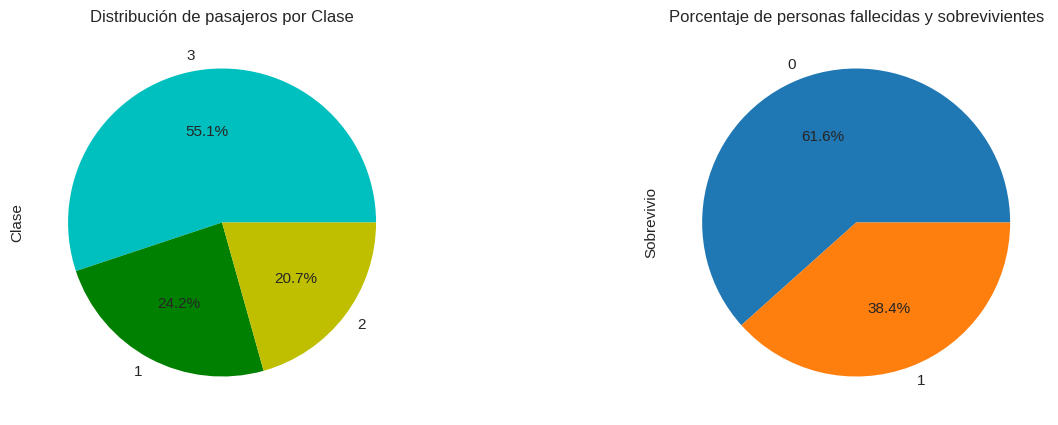

In [ ]:
figure,axis = plt.subplots(1,2,figsize=(15,5))
titanic.Clase.value_counts().plot.pie(autopct='%1.1f%%',shadow=False, \
                                ax=axis[0], legend = False, fontsize=11, \
                                colors = ['c', 'g','y'])
axis[0].set_title('Distribución de pasajeros por Clase')
titanic.Sobrevivio.value_counts().plot.pie(autopct='%1.1f%%',shadow=False, \
                                ax=axis[1], legend = False, fontsize=11)
axis[1].set_title('Porcentaje de personas fallecidas y sobrevivientes')
plt.show()

 **Variables Numéricas Continuas** 

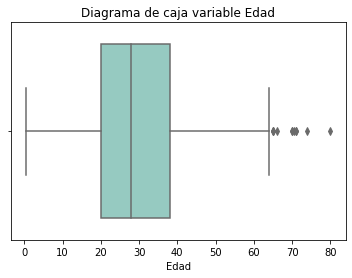

In [ ]:
ax = sns.boxplot(x="Edad",data=titanic, palette="Set3").set_title('Diagrama de caja variable Edad')

Text(0.5, 1.0, 'Distribución variable Edad')

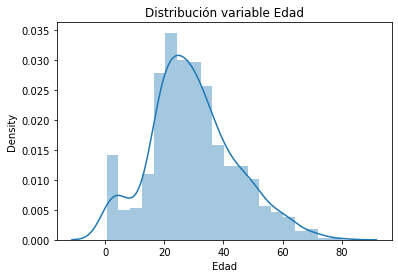

In [ ]:
sns.distplot(titanic['Edad']).set_title('Distribución variable Edad')


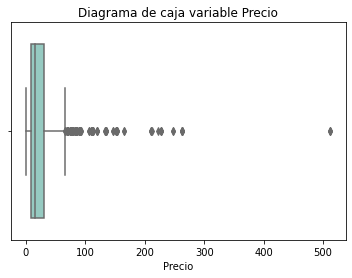

In [ ]:
ax = sns.boxplot(x="Precio",data=titanic, palette="Set3").set_title('Diagrama de caja variable Precio')

Text(0.5, 1.0, 'Distribución variable Precio')

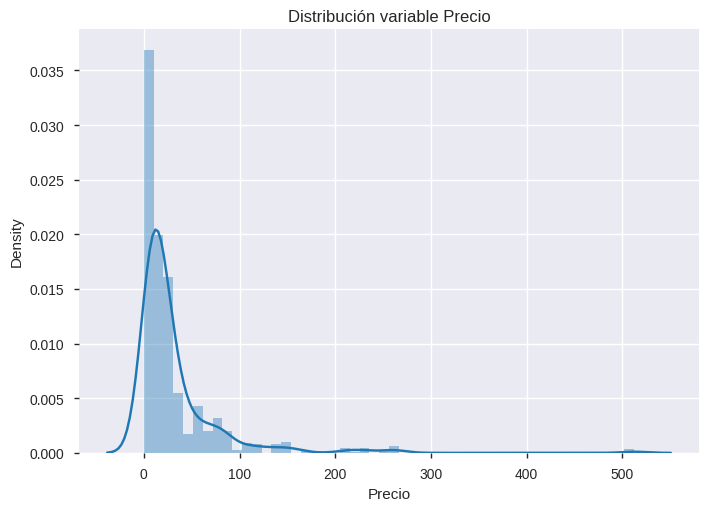

In [ ]:
sns.distplot(titanic['Precio']).set_title('Distribución variable Precio')

**¿Cómo cambian las gráficas con el nuevo registro que agregamos?**

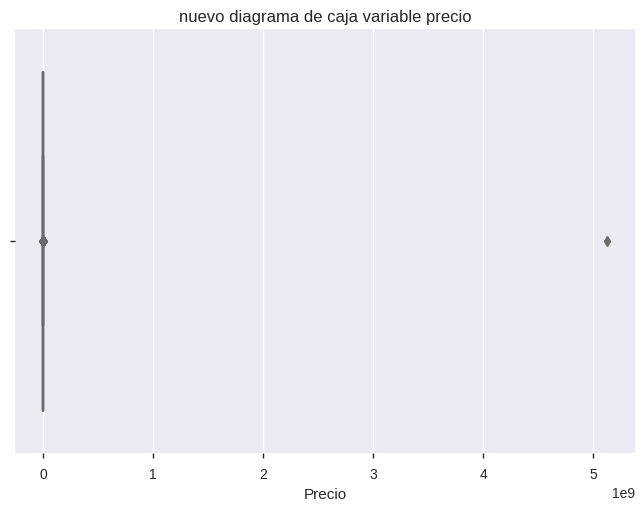

In [ ]:
ax = sns.boxplot(x="Precio",data=new_df,palette="Set3").set_title('nuevo diagrama de caja variable precio')

Text(0.5, 1.0, 'Nueva Distribución variable Precio')

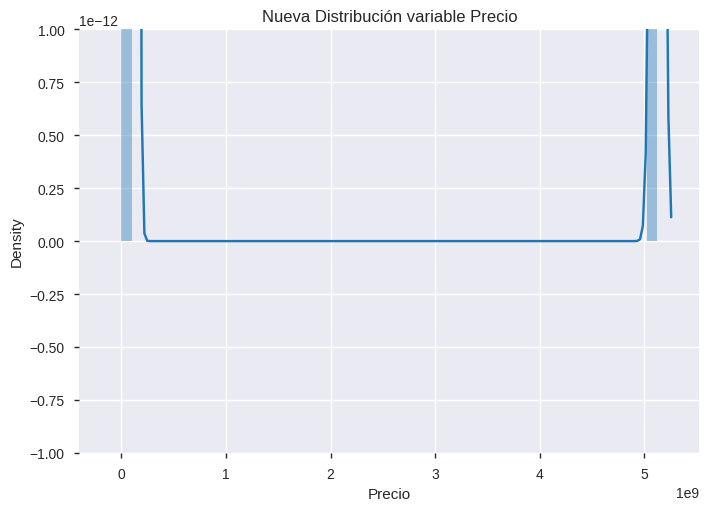

In [ ]:
sns.distplot(new_df['Precio']).set_title('Nueva Distribución variable Precio')

 **Variables Numericas discretas** 

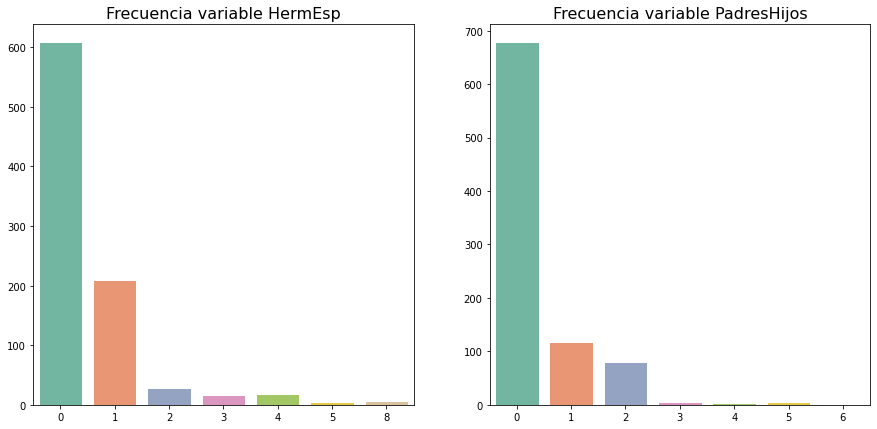

In [ ]:
(figure, axis) = plt.subplots(nrows=1 , ncols=2, figsize=(15,7))
ax = axis.flat
discretas = ['HermEsp','PadresHijos']

sns.set_style("darkgrid")
for i in range(len(discretas)):
    sns.countplot(x = discretas[i],data=titanic,ax= ax[i],palette="Set2")
    ax[i].set_title('Frecuencia variable '+ discretas[i], fontsize = 16)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('');
